<a href="https://colab.research.google.com/github/amir1m/learning-ml/blob/master/FCML_CoinToss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from scipy.special import comb
import matplotlib.pyplot as plt


In [0]:
def get_binomial_prob(N,y,r):
  return(comb(10, y) * (r ** y) * (1 - r) ** (N - y) )


In [0]:
def get_binomial_prob_dist(N = 10,r = 0.5):
  prob_y = []
  for y in range(0,N+1,1):
    prob_y.append(get_binomial_prob(N, y, r))
  return prob_y

In [0]:
def plot_dist(prob_y):
  N = len(prob_y)
  plt.bar(range(0,N), prob_y)
  plt.xticks(ticks=range(0,N))
  plt.xlabel("y")
  plt.ylabel("P(y)")
  plt.plot(range(0,N), prob_y)


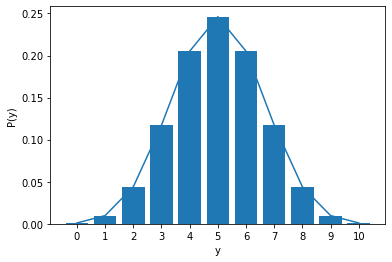

In [12]:
plot_dist(get_binomial_prob_dist(N = 10, r = 0.5))

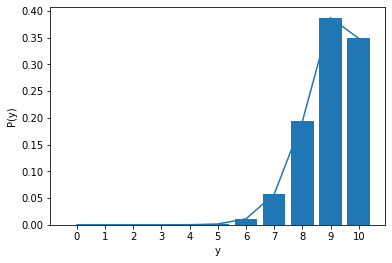

In [14]:
plot_dist(get_binomial_prob_dist(N = 10, r = 0.9))

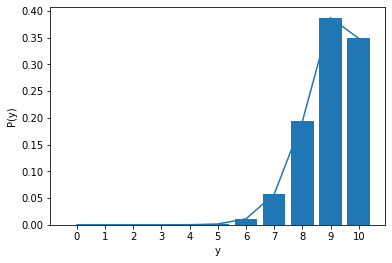

In [8]:
plot_dist ( N=10, prob_y = get_binomial_prob_dist(N=10, r=0.9 ))